# Table of Contents

### Contents:
- [Imports, reading in data](#Initial-Steps)
- [Choosing features](#Choosing-features)
- [Fitting the model](#Fitting-the-model)
- [Scoring and evaluating the model](#Scoring-and-evaluating-the-model)

This model is going to take into account everything that is NOT location. 

# Initial Steps

In [1]:
# imports

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# read in cleaned TRAIN data
train = pd.read_csv('../datasets/train_clean_dum.csv')

In [3]:
train.shape

(1556, 247)

In [4]:
# I want to play with the training data, I don't actually want to mess with it
# rerun this cell to get original data
df = train

In [5]:
# read in cleaned TEST data
test = pd.read_csv('../datasets/test_clean_dum.csv')

In [6]:
test.shape

(878, 246)

#### * note that the baseline model is the mean house price, done in april 2 notebook


# Choosing features

#### By inspection, I decided that these were the columns most related to location:

- MS Zoning
- Neighborhood
- Condition 1
- Condition 2


In [8]:
# make a list of location related data, drop it from the data frame
features_to_drop =[]
for name in train.columns:
    if 'ms_zoning' in name:
        features_to_drop.append(name)
    elif 'neighborhood' in name:
        features_to_drop.append(name)
    elif 'condition' in name:
        features_to_drop.append(name)

In [9]:
# also want to drop saleprice for x 

features_to_drop.append('saleprice')

In [10]:
# let X be the numeric columns most strongly correlated to sale price
X = df.drop(columns = features_to_drop)

# let y be the sale price, the goal output
y = df['saleprice']

In [11]:
# save a copy of the official TEST dataset that has these same columns
features = X.columns
test_mod_5 = test[features]
test_mod_5.to_csv('../datasets/test_mod_5.csv')

# Fitting the model

In [12]:
# split our data into train and test data to properly cross validate our model 

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 5)

In [13]:
# instantiate linear regression model and fit it to our data

lr = LinearRegression()
lr.fit(X_train, y_train)

# look at the coefficients and interpret them
pd.Series(lr.coef_, index = features)

id                -8.834802e+00
pid                1.719423e-08
ms_subclass       -9.106451e+01
lot_frontage       5.665273e+01
lot_area           1.930141e+00
                       ...     
sale_type_ConLw    1.183654e+04
sale_type_New      2.101701e+04
sale_type_Oth      8.093940e+04
sale_type_VWD      0.000000e+00
sale_type_WD       9.397133e+03
Length: 203, dtype: float64

# Scoring and evaluating the model

In [15]:
# scoring

print(f'The training score is: {lr.score(X_train, y_train)}')
print(f'The testing score is: {lr.score(X_test, y_test)}')
print(f'The cross validation score is: {cross_val_score(lr, X_train, y_train, cv=5).mean()}')

# Super overfit, very high variance, low bias

The training score is: 0.9405131118828912
The testing score is: 0.5857765151277651
The cross validation score is: 0.6505881332484128


In [16]:
# generate the predicted values
y_preds = lr.predict(X)

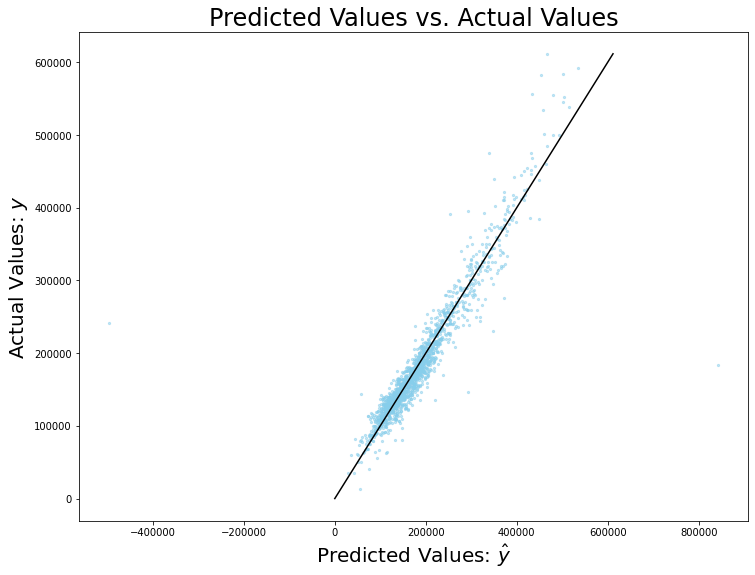

In [17]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_preds, y, s=5, color='skyblue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

# looks like we might want to take the log

In [18]:
lr.predict(test_mod_5)

array([ 138983.60279945,  137786.76926841,  223238.85570673,
        117080.07414667,  170543.70733039,   84644.17127511,
        113483.46697841,  151342.8657047 ,  167920.15316365,
        163384.46310174,  152495.12345211,  121214.9039477 ,
        143660.34054898,  275138.11173091,  111333.47634692,
        112147.02880216,  167509.09915427,  118870.21623345,
        190523.36818176,  194627.57664314,  146773.86858403,
        132825.39202843,  202182.83248282, -559541.02738321,
        182137.23239501,  114823.90757053,  120138.23885123,
        160583.99506281,  169212.06546581,   41191.34536238,
        109185.51457782,   86130.08377314,  208267.31684025,
        151738.69593578,  213286.43757869,  198283.74527985,
        135763.64446329,   70551.10436384,  102480.96262873,
        188087.70487158,  159402.81918983,  203857.51933644,
        149295.17173483,  161707.73593634,  206710.39965084,
        101842.25782672,  213751.1692588 ,  115276.95139622,
        117025.12937294,

In [19]:
# let's submit this to kaggle

# this will go in the sale price column 
y_preds_test = lr.predict(test_mod_5)

submission = pd.DataFrame(y_preds_test, columns = ['SalePrice'])
submission['Id'] = test['id']

In [20]:
submission.shape

(878, 2)

In [21]:
submission.to_csv('../datasets/submissions/sub_mod_5.csv', index = False)

In [27]:
# baseline model should be the mean of y
# look at april 2 notebook

# check the scores of the model with the mean
sub = pd.read_csv('../datasets/submissions/sub_3.csv')

In [28]:
sub.shape

(878, 2)

# Kaggle Score

 not yet submitted